In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action = 'ignore',category = SettingWithCopyWarning)

In [5]:
df=pd.read_csv('eurusd.csv')

In [6]:
df=df.set_index('Dates')
df

,Open,High,Low,Close
Dates,,,,
1/3/00,1.0073,1.0285,1.0052,1.0062
1/4/00,1.0244,1.0341,1.0217,1.0243
1/5/00,1.0300,1.0403,1.0285,1.0296
1/6/00,1.0325,1.0414,1.0280,1.0321
1/7/00,1.0329,1.0334,1.0255,1.0328
...,...,...,...,...
4/26/21,1.2096,1.2117,1.2061,1.2097
4/27/21,1.2086,1.2093,1.2057,1.2086
4/28/21,1.2091,1.2135,1.2056,1.2091


# Step 1: Find 1st and 2nd Derivative dP/dt based on Close Price


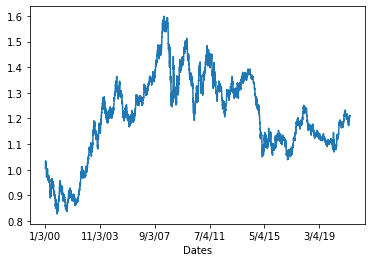

In [9]:
close_prices = df[ "Close"]
close_prices.plot();

In [10]:
h = 1 

denominator = 12 * 1.0 * h**1

numerator = (1 * close_prices.shift(periods = 2) -
             8 * close_prices.shift(periods = 1) +
             0 * close_prices.shift(periods = 0) +
             8 * close_prices.shift(periods = -1) - 
             1 * close_prices.shift(periods = -2))

first_derivative = numerator / denominator 
first_derivative

Dates
1/3/00          NaN
1/4/00          NaN
1/5/00     0.002983
1/6/00     0.001700
1/7/00    -0.001400
             ...   
4/26/21    0.004267
4/27/21   -0.001325
4/28/21    0.002467
4/29/21         NaN
4/30/21         NaN
Name: Close, Length: 5565, dtype: float64

In [11]:
df['First_Derivative']=first_derivative


In [12]:
h = 1 

denominator = 12 * 1.0 * h**2

numerator = (-1 * close_prices.shift(periods = 2) +
             16 * close_prices.shift(periods = 1) +
             -30 * close_prices.shift(periods = 0) +
             16 * close_prices.shift(periods = -1) + 
             -1 * close_prices.shift(periods = -2))

second_derivative = numerator / denominator 
second_derivative

Dates
1/3/00          NaN
1/4/00          NaN
1/5/00    -0.002050
1/6/00    -0.001533
1/7/00    -0.004467
             ...   
4/26/21   -0.011833
4/27/21    0.002392
4/28/21    0.003700
4/29/21         NaN
4/30/21         NaN
Name: Close, Length: 5565, dtype: float64

In [13]:
df['Second_Derivative']=second_derivative

In [14]:
df

,Open,High,Low,Close,First_Derivative,Second_Derivative
Dates,,,,,,
1/3/00,1.0073,1.0285,1.0052,1.0062,NaN,NaN
1/4/00,1.0244,1.0341,1.0217,1.0243,NaN,NaN
1/5/00,1.0300,1.0403,1.0285,1.0296,0.002983,-0.002050
1/6/00,1.0325,1.0414,1.0280,1.0321,0.001700,-0.001533
1/7/00,1.0329,1.0334,1.0255,1.0328,-0.001400,-0.004467
...,...,...,...,...,...,...
4/26/21,1.2096,1.2117,1.2061,1.2097,0.004267,-0.011833
4/27/21,1.2086,1.2093,1.2057,1.2086,-0.001325,0.002392
4/28/21,1.2091,1.2135,1.2056,1.2091,0.002467,0.003700


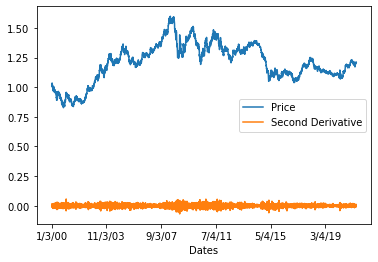

In [23]:
plot_data = pd.concat([close_prices, first_derivative, second_derivative], axis = 1)
plot_data.columns = ["Price", "First Derivative", "Second Derivative"]
plot_data[['Price',"Second Derivative"]].plot();

<AxesSubplot:xlabel='Dates'>

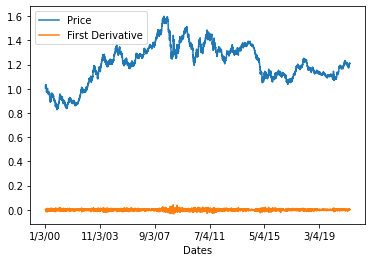

In [31]:
plot_data[['Price','First Derivative']].plot()

# Step 2: Check Strategy based on 1st and 2nd Derivative

In [32]:
signals=pd.DataFrame()
signals['currency price'] = df['Close']
signals['First Derivative']=df["First_Derivative"]
signals['Second Derivative']=df['Second_Derivative']
signals

,currency price,First Derivative,Second Derivative
Dates,,,
1/3/00,1.0062,NaN,NaN
1/4/00,1.0243,NaN,NaN
1/5/00,1.0296,0.002983,-0.002050
1/6/00,1.0321,0.001700,-0.001533
1/7/00,1.0328,-0.001400,-0.004467
...,...,...,...
4/26/21,1.2097,0.004267,-0.011833
4/27/21,1.2086,-0.001325,0.002392
4/28/21,1.2091,0.002467,0.003700


In [33]:
signals['Strategy']='Non'

In [34]:
for val in range(len(signals)):
    if abs(signals["First Derivative"][val])>0.001 and signals["Second Derivative"][val]>0 :
        signals['Strategy'][val]= 'Trend Stratey' 
    else: 
        signals['Strategy'][val]= 'Mean Reverting Strategy'

signals.head(20)

,currency price,First Derivative,Second Derivative,Strategy
Dates,,,,
1/3/00,1.0062,NaN,NaN,Mean Reverting Strategy
1/4/00,1.0243,NaN,NaN,Mean Reverting Strategy
1/5/00,1.0296,0.002983,-0.002050,Mean Reverting Strategy
1/6/00,1.0321,0.001700,-0.001533,Mean Reverting Strategy
1/7/00,1.0328,-0.001400,-0.004467,Mean Reverting Strategy
1/10/00,1.0295,-0.004925,-0.001358,Mean Reverting Strategy
1/11/00,1.0256,0.002892,0.014825,Trend Stratey
1/12/00,1.0336,0.003842,-0.013275,Mean Reverting Strategy
1/13/00,1.0309,-0.004083,-0.001200,Mean Reverting Strategy


# Step 3: Simple Case with window = 8 #of std=1

In [35]:
signals['signals']=0
signals['position']=0

In [36]:
window = 8
no_of_std = 1        
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()
signals['Rolling Mean'] = rolling_mean
signals['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
signals['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
signals['signals'] = 0
signals

,currency price,First Derivative,Second Derivative,Strategy,signals,position,Rolling Mean,Bollinger High,Bollinger Low
Dates,,,,,,,,,
1/3/00,1.0062,NaN,NaN,Mean Reverting Strategy,0,0,NaN,NaN,NaN
1/4/00,1.0243,NaN,NaN,Mean Reverting Strategy,0,0,NaN,NaN,NaN
1/5/00,1.0296,0.002983,-0.002050,Mean Reverting Strategy,0,0,NaN,NaN,NaN
1/6/00,1.0321,0.001700,-0.001533,Mean Reverting Strategy,0,0,NaN,NaN,NaN
1/7/00,1.0328,-0.001400,-0.004467,Mean Reverting Strategy,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4/26/21,1.2097,0.004267,-0.011833,Mean Reverting Strategy,0,0,1.201875,1.206099,1.197651
4/27/21,1.2086,-0.001325,0.002392,Trend Stratey,0,0,1.203200,1.207689,1.198711
4/28/21,1.2091,0.002467,0.003700,Trend Stratey,0,0,1.204750,1.208793,1.200707


In [37]:
for val in range(len(signals)):
    if signals['Strategy'][val]=='Mean Reverting Strategy':
        if signals['currency price'][val]>signals['Bollinger High'][val]:
            signals['signals'][val]=-1
        elif signals['currency price'][val]<signals['Bollinger Low'][val]:
            signals['signals'][val]=1
    
    else: 
        if signals['currency price'][val]>signals['Bollinger High'][val]:
            signals['signals'][val]=1
        elif  signals['currency price'][val]<signals['Bollinger Low'][val]:
            signals['signals'][val]=-1
    signals['position']=signals['signals'].diff()
    # if the buy or sell signals keep appearing, we only count the first signal

In [38]:
signals.head(50)

,currency price,First Derivative,Second Derivative,Strategy,signals,position,Rolling Mean,Bollinger High,Bollinger Low
Dates,,,,,,,,,
1/3/00,1.0062,NaN,NaN,Mean Reverting Strategy,0,NaN,NaN,NaN,NaN
1/4/00,1.0243,NaN,NaN,Mean Reverting Strategy,0,0.0,NaN,NaN,NaN
1/5/00,1.0296,0.002983,-0.002050,Mean Reverting Strategy,0,0.0,NaN,NaN,NaN
1/6/00,1.0321,0.001700,-0.001533,Mean Reverting Strategy,0,0.0,NaN,NaN,NaN
1/7/00,1.0328,-0.001400,-0.004467,Mean Reverting Strategy,0,0.0,NaN,NaN,NaN
1/10/00,1.0295,-0.004925,-0.001358,Mean Reverting Strategy,0,0.0,NaN,NaN,NaN
1/11/00,1.0256,0.002892,0.014825,Trend Stratey,0,0.0,NaN,NaN,NaN
1/12/00,1.0336,0.003842,-0.013275,Mean Reverting Strategy,0,0.0,1.026713,1.035636,1.017789
1/13/00,1.0309,-0.004083,-0.001200,Mean Reverting Strategy,0,0.0,1.029800,1.033137,1.026463


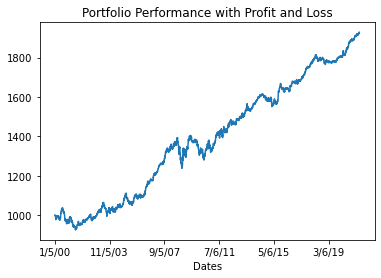

,asset,holdings,cash,total asset,return,positions
Dates,,,,,,
1/5/00,1.0296,0.0000,1000.0000,1000.0000,0.000000e+00,0.0
1/6/00,1.0321,0.0000,1000.0000,1000.0000,0.000000e+00,0.0
1/7/00,1.0328,0.0000,1000.0000,1000.0000,0.000000e+00,0.0
1/10/00,1.0295,0.0000,1000.0000,1000.0000,0.000000e+00,0.0
1/11/00,1.0256,0.0000,1000.0000,1000.0000,0.000000e+00,0.0
1/12/00,1.0336,0.0000,1000.0000,1000.0000,0.000000e+00,0.0
1/13/00,1.0309,0.0000,1000.0000,1000.0000,0.000000e+00,0.0
1/14/00,1.0258,641.1250,358.8750,1000.0000,0.000000e+00,1.0
1/17/00,1.0122,-632.6250,1624.1250,991.5000,-8.500000e-03,-2.0


In [40]:
# total initial money set at 1000 usd
money = 1000

# shares to buy for position, floor divison
positions = (money)// max(signals['currency price'])

# pnl
portfolio = pd.DataFrame()
portfolio['asset'] = signals['currency price']
portfolio['holdings'] = signals['position'].cumsum() * signals['currency price'] * positions
portfolio['cash'] = money - (signals['position'] * signals['currency price'] * positions).cumsum()
portfolio['total asset'] = portfolio['holdings'] + portfolio['cash']
portfolio['return'] = portfolio['total asset'].pct_change()
portfolio['positions'] = signals['position']

portfolio = portfolio.dropna()

# plot the asset value change of the portfolio and pnl along with z-score

portfolio['total asset'].plot()
plt.title('Portfolio Performance with Profit and Loss')
plt.show()
portfolio.head(50)

In [41]:
returns =  (portfolio['total asset']- portfolio['total asset'].shift(1))/ portfolio['total asset'].shift(1)
sharp_ratio = returns.mean()/returns.std()*np.sqrt(365)
print('sharpe ratio  =',sharp_ratio)

sharpe ratio  = 0.9443038076143355


# Step 4: For loops to find the PnL of all possible pairs (Window, STD)

In [42]:

pnl=[]
win=[]
std=[]
for y in np.arange(0.8,3,0.1):
   
    for x in range(1,101):
        
        window = x
        no_of_std = y        
        rolling_mean = df['Close'].rolling(window).mean()
        rolling_std = df['Close'].rolling(window).std()
        signals['Rolling Mean'] = rolling_mean
        signals['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
        signals['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
        signals['signals'] = 0
        
        for val in range(len(signals)):
            if signals['Strategy'][val]=='Mean Reverting Strategy':
                if signals['currency price'][val]>signals['Bollinger High'][val]:
                    signals['signals'][val]=-1
                elif signals['currency price'][val]<signals['Bollinger Low'][val]:
                    signals['signals'][val]=1
            else: 
                if signals['currency price'][val]>signals['Bollinger High'][val]:
                    signals['signals'][val]=1
                elif  signals['currency price'][val]<signals['Bollinger Low'][val]:
                    signals['signals'][val]=-1
        signals['position']=signals['signals'].diff()
    # if the buy or sell signals keep appearing, we only count the first signal
        
        

        money = 1000
        positions = (money)// max(signals['currency price'])
        portfolio = pd.DataFrame()
        portfolio['asset'] = signals['currency price']
        portfolio['holdings'] = signals['position'].cumsum() * signals['currency price'] * positions
        portfolio['cash'] = money - (signals['position'] * signals['currency price'] * positions).cumsum()
        portfolio['total asset'] = portfolio['holdings'] + portfolio['cash']
        portfolio['return'] = portfolio['total asset'].pct_change()
        portfolio['positions'] = signals['position']
        portfolio = portfolio.dropna()
        pnl.append(portfolio["total asset"].iloc[-1])
        win.append(window)
        std.append(no_of_std)

In [43]:
newt=pd.DataFrame()

In [44]:
newt['PNL']=pnl
newt['window']=win
newt['#STD']=std
newt

,PNL,window,#STD
0,1000.0000,1,0.8
1,945.6875,2,0.8
2,2384.6875,3,0.8
3,2297.9375,4,0.8
4,2230.6250,5,0.8
...,...,...,...
2195,1074.0000,96,2.9
2196,1065.3750,97,2.9
2197,1055.4375,98,2.9
2198,1073.8125,99,2.9


In [46]:
newt.sort_values('PNL',ascending=False)

,PNL,window,#STD
2,2384.6875,3,0.8
102,2342.6250,3,0.9
3,2297.9375,4,0.8
4,2230.6250,5,0.8
104,2191.0625,5,0.9
...,...,...,...
1901,945.6875,2,2.7
1401,945.6875,2,2.2
1,945.6875,2,0.8
1101,945.6875,2,1.9


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

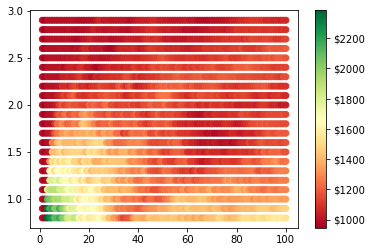

In [56]:
sctr = plt.scatter(x=newt['window'], y=newt['#STD'], c=newt['PNL'], cmap='RdYlGn')
plt.colorbar(sctr, format='$%d')

In [60]:
Top220=newt.sort_values("PNL",ascending=False).head(220)
Top220

,PNL,window,#STD
2,2384.6875,3,0.8
102,2342.6250,3,0.9
3,2297.9375,4,0.8
4,2230.6250,5,0.8
104,2191.0625,5,0.9
...,...,...,...
49,1463.1250,50,0.8
44,1462.5000,45,0.8
1017,1460.5000,18,1.8
420,1459.9375,21,1.2


In [61]:
Top220.mean()

PNL       1645.282102
window      25.872727
#STD         1.099091
dtype: float64

In [62]:
Top220.std()

PNL       193.184607
window     26.536994
#STD        0.251569
dtype: float64

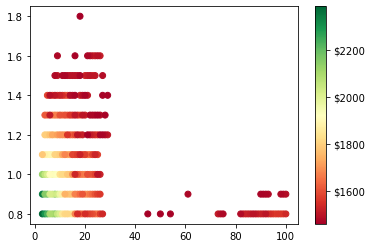

In [64]:
sctr2 = plt.scatter(x=Top220['window'], y=Top220['#STD'], c=Top220['PNL'], cmap='RdYlGn')
plt.colorbar(sctr2, format='$%d')